# k-nearest neighbours and vectorisation
Meichen Lu (meichenlu91@gmail.com) 14th April 2018

Code taken from [Vectorization](http://cs229.stanford.edu/syllabus.html). Note that the equation for dists_1 and dists_2 were wrong in the original code.

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = fetch_mldata('MNIST original')

X = mnist.data.astype(float)
Y = mnist.target.astype(float) 

mask = np.random.permutation(range(np.shape(X)[0]))

In [3]:
num_train = 10000
num_test = 500
K = 10
X_train = X[mask[:num_train]]
Y_train = Y[mask[:num_train]]

X_mean = np.mean(X_train,axis = 0)
X_train = (X_train-X_mean)/255
X_test = X[mask[num_train:num_train+num_test]]
X_test = (X_test - X_mean)/255

Y_test = Y[mask[num_train:num_train+num_test]]
print('X_train',X_train.shape)
print('Y_train',Y_train.shape)
print('X_test',X_test.shape)
print('Y_test',Y_test.shape)

X_train (10000, 784)
Y_train (10000,)
X_test (500, 784)
Y_test (500,)


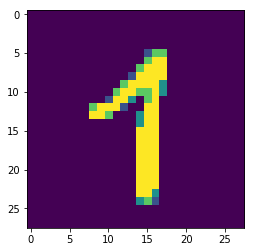

In [4]:
ex_image = (np.reshape(X_train[10,:]*255 + X_mean, (28, 28))).astype(np.uint8)
plt.imshow(ex_image, interpolation='nearest')

In [5]:
# Version 1 (Naive implementation using two for loops)

start = time.time()
dists_1 = np.zeros((num_test,num_train))
for i in range(num_test):
    for j in range(num_train):
          dists_1[i,j] = np.sqrt(np.sum(np.square(X_test[i,:]-X_train[j,:])))

stop = time.time()
time_taken = stop-start
print('Time taken with two for loops: {}s'.format(time_taken))

Time taken with two for loops: 45.18689179420471s


In [6]:
# Version 2(Somewhat better implementation using one for loop)

start = time.time()
dists_2 = np.zeros((num_test,num_train))
for i in range(num_test):
    dists_2[i,:] = np.sqrt(np.sum(np.square(X_test[i,:]-X_train),axis = 1))
        
stop = time.time()
time_taken = stop-start
print('Time taken with just one for loop: {}s'.format(time_taken))

Time taken with just one for loop: 22.42441701889038s


In [7]:
# Version 3 (Fully vectorized implementation with no for loop)

start = time.time()
dists_3 = np.zeros((num_test,num_train))
A = np.sum(np.square(X_test),axis = 1)
B = np.sum(np.square(X_train),axis = 1)
C = np.dot(X_test,X_train.T)

dists_3 = np.sqrt(A[:,np.newaxis]+B[np.newaxis,:]-2*C)
        
stop = time.time()
time_taken = stop-start
print('Time taken with no for loops: {}s'.format(time_taken))

Time taken with no for loops: 0.21134209632873535s


In [8]:
# Prediction accuracy
sorted_dist_indices = np.argsort(dists_3,axis = 1)

closest_k = Y_train[sorted_dist_indices][:,:K].astype(int)
Y_pred = np.zeros_like(Y_test)

for i in range(num_test):
      Y_pred[i] = np.argmax(np.bincount(closest_k[i,:]))


accuracy = (np.where(Y_test-Y_pred == 0)[0].size)/float(num_test)
print('Prediction accuracy: {}%'.format(accuracy*100))

Prediction accuracy: 94.39999999999999%


### Explanation of the fully vectorised implementation
1. The distance between 2 vectors $x_1$ and $x_2$ are 
$$\Vert x_1 - x_2 \Vert = \sqrt{ \sum_i x_{1,i}^2 +\sum_i x_{2,i}^2 - 2\sum_i x_{1,i}x_{2,i}} $$
2. A, B, C represents the three terms on the right hand side
3. The newaxis expands the dimension, making A a column vector of shape (500,1) and B a row vector of shape (1,10000)
4. When subtracting the two vectors, numpy automatically replicate the rows and columns such that the matrices' have the same shape. (In MatLab, one need to use repmat function to repeat the row/column vectors.

In [9]:
np.shape(C)

(500, 10000)